In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/archive (2).zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import keras


In [ ]:
base_model= InceptionV3(input_shape=(256,256,3),include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
X=Flatten()(base_model.output)
X=Dense(units=2,activation='sigmoid')(X)

model=Model(base_model.input,X)

model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

#Pre-Process the data

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center=True,
                                   rotation_range=0.4,
                                   width_shift_range=0.3,
                                   horizontal_flip=True
                                  ,preprocessing_function=preprocess_input,
                                   zoom_range=0.4,
                                   shear_range=0.4)
train_data =train_datagen.flow_from_directory(directory="/content/train_data",target_size=(256,256),batch_size=36)

Found 150 images belonging to 1 classes.


In [ ]:
train_data.class_indices

{'train_data': 0}

In [ ]:
t_img,label=train_data.next()

In [ ]:
t_img

array([[[[-0.6392157 , -0.58431375, -0.5058824 ],
         [-0.6392157 , -0.58431375, -0.5058824 ],
         [-0.6392157 , -0.58431375, -0.5058824 ],
         ...,
         [-0.6156863 , -0.5058824 , -0.4352941 ],
         [-0.6156863 , -0.5058824 , -0.4352941 ],
         [-0.6156863 , -0.5058824 , -0.4352941 ]],

        [[-0.6392157 , -0.58431375, -0.5058824 ],
         [-0.6392157 , -0.58431375, -0.5058824 ],
         [-0.6392157 , -0.58431375, -0.5058824 ],
         ...,
         [-0.6156863 , -0.5058824 , -0.4352941 ],
         [-0.6156863 , -0.5058824 , -0.4352941 ],
         [-0.6156863 , -0.5058824 , -0.4352941 ]],

        [[-0.6392157 , -0.58431375, -0.5058824 ],
         [-0.6392157 , -0.58431375, -0.5058824 ],
         [-0.6392157 , -0.58431375, -0.5058824 ],
         ...,
         [-0.6156863 , -0.5058824 , -0.4352941 ],
         [-0.6156863 , -0.5058824 , -0.4352941 ],
         [-0.6156863 , -0.5058824 , -0.4352941 ]],

        ...,

        [[-0.5921569 , -0.4823529 , -0

In [ ]:
def plotImage(img_arr,label):
  for idx,img in enumerate(img_arr):
    if idx<=10:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.axis=False
      plt.show


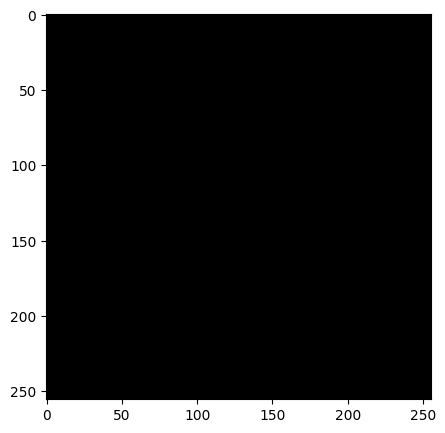

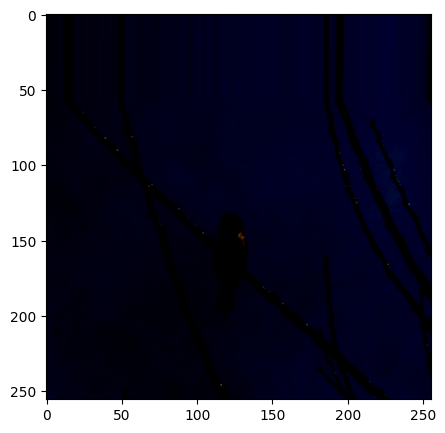

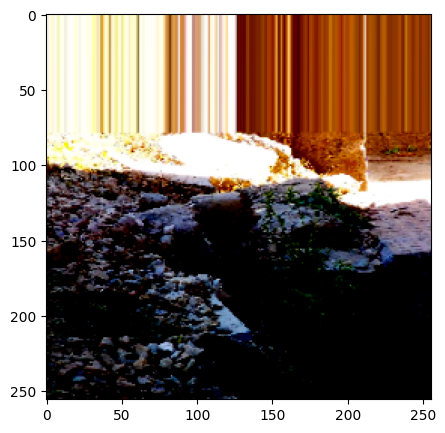

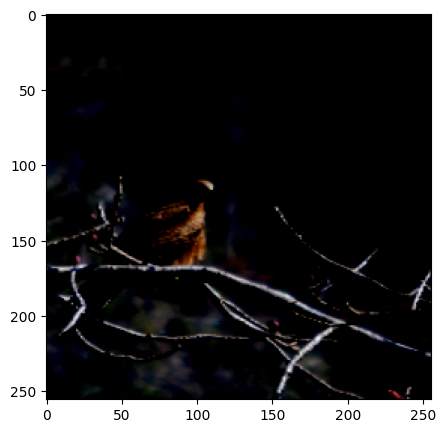

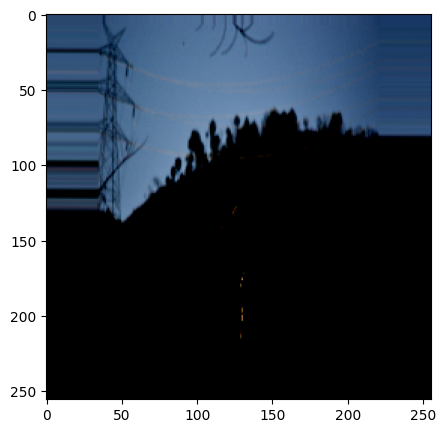

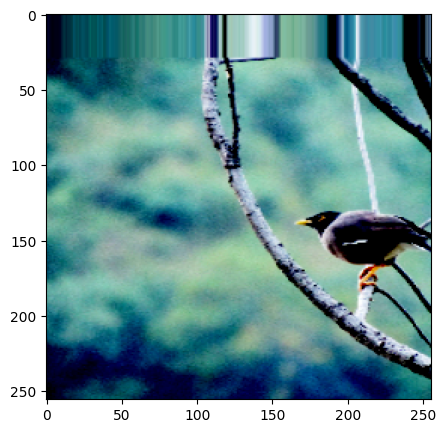

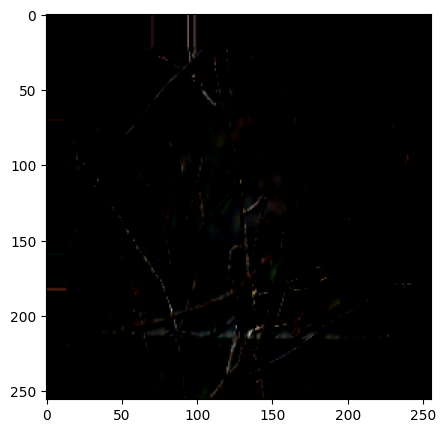

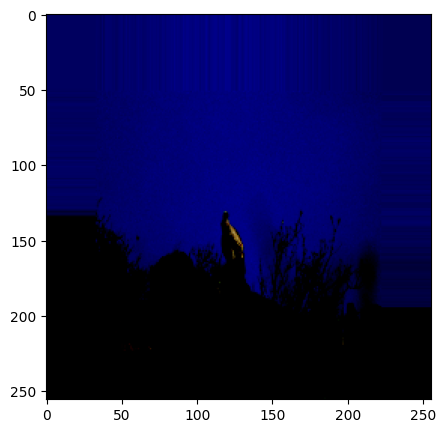

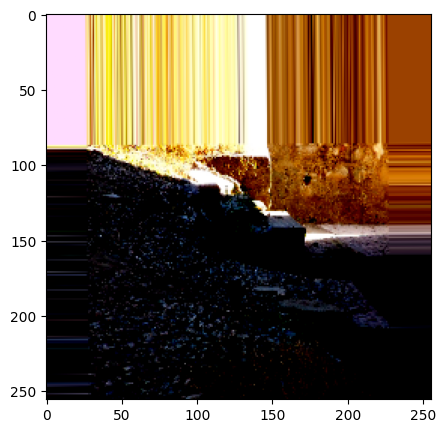

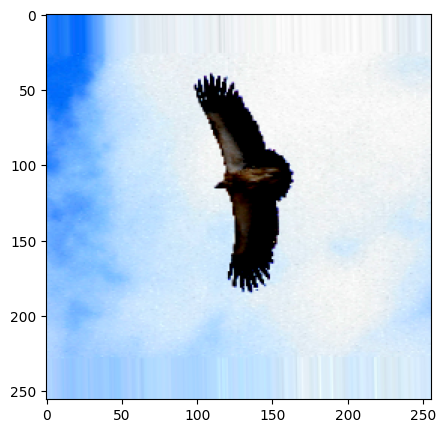

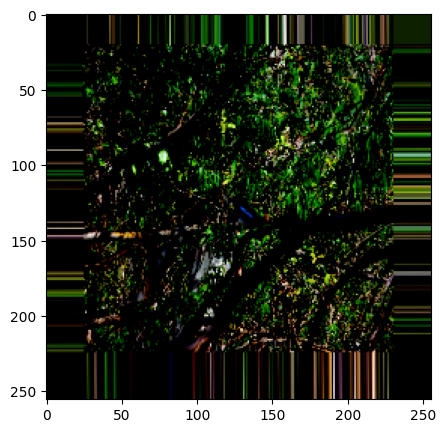

In [ ]:
plotImage(t_img,label)

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
mc=ModelCheckpoint(filepath="./best_model.h5",
                   monitor="val_accuracy",
                   verbose=1,
                   save_best_only=True)
es=EarlyStopping(monitor="val_accuracy",
                 min_delta=0.01,
                 patience=5,
                 verbose=1

                 )
cb=[mc,es]

In [ ]:
his=model.fit_generator(train_data,steps_per_epoch=10,epochs=30,callbacks=cb)

<ipython-input-43-d125180c5be5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(train_data,steps_per_epoch=10,epochs=30,callbacks=cb)


Epoch 1/30
 5/10 [==============>...............] - ETA: 59s - loss: 0.2309 - accuracy: 0.4133 

10/10 [==============================] - 74s 5s/step - loss: 0.2309 - accuracy: 0.4133


In [ ]:
from keras.models import load_model
model=load_model("/content/best_model.h5")

OSError: ignored